# S08 T01: Tasca del test d'hipòtesis

## Nivell 1. Exercici 1
### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.  

In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Seaborn for plotting and styling
import seaborn as sns

#preprocessing and analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("highest_earning_players.csv")
df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [3]:
df.isna().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [4]:
count = df['Game'].value_counts() 
print(count) 

Overwatch                           100
Hearthstone                         100
Arena of Valor                      100
PUBG                                100
League of Legends                   100
Starcraft II                        100
Fortnite                            100
Dota 2                              100
Heroes of the Storm                 100
Counter-Strike: Global Offensive    100
Name: Game, dtype: int64


In [5]:
# the mean of TotalUSDPrize for all the observations is:
round(df["TotalUSDPrize"].mean(),2)

397793.22

#### Hypothesis
\begin{equation*}
H_{0}: mu = 397793 \end{equation*}
\begin{equation*} H_{A}: mu \neq 397793
\end{equation*}

##### We want to see if the mean prize for a specific game, Fortnite for instance, is or not equal to the mean prize for all the games.
##### the hypothesis H 0  : the me mean prize for Fornite is equal to the mean prize for all games (397793)
##### the hypothesis H A : both means are not equal.

In [6]:
selection = df.loc[df['Game'] == "Fortnite"]
selection.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
300,56483,Kyle,Giersdorf,Bugha,us,3141395.05,Fortnite,Battle Royale
301,59528,David,Wang,Aqua,at,1923774.23,Fortnite,Battle Royale
302,25047,Harrison,Chang,psalm,us,1873138.80,Fortnite,Battle Royale
303,54656,Emil,Bergquist Pedersen,Nyhrox,no,1536845.69,Fortnite,Battle Royale
304,61948,Shane,Cotton,EpikWhale,us,1349767.32,Fortnite,Battle Royale


Text(0, 0.5, 'Prize in dollars')

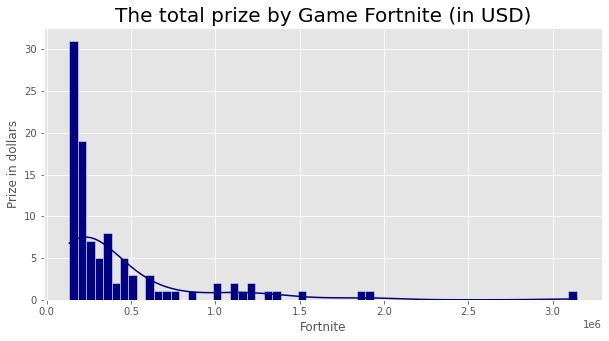

In [7]:
# Graphic of prize distribution: Fornite game
fig, ax = plt.subplots(figsize =(10, 5))
g = sns.histplot(data = selection, x='TotalUSDPrize', alpha = 1, color = 'navy', bins = 60, kde = True)
plt.title('The total prize by Game Fortnite (in USD)', fontsize=20)
plt.xlabel('Fortnite')
plt.ylabel('Prize in dollars')

Text(0, 0.5, 'Prize in dollars')

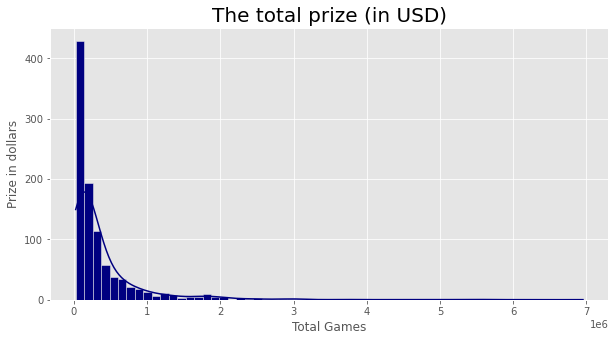

In [8]:
# Graphic of prize distribution total df
fig, ax = plt.subplots(figsize =(10, 5))
g = sns.histplot(data = df, x='TotalUSDPrize', alpha = 1, color = 'navy', bins = 60, kde = True)
plt.title('The total prize (in USD)', fontsize=20)
plt.xlabel('Total Games')
plt.ylabel('Prize in dollars')

Text(0.5, 1.0, 'Independent Sample T-Test')

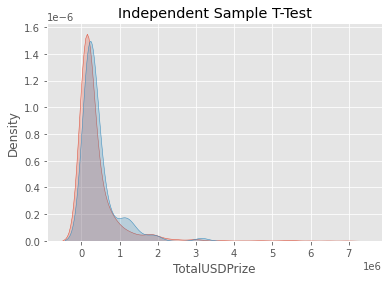

In [9]:
# histogram of our 2 samples
a = df.TotalUSDPrize
b = selection.TotalUSDPrize
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

In [10]:
# We take the mean prize for League of Legends
Fortnite_mean = round(selection["TotalUSDPrize"].mean(),2)
Fortnite_mean

434093.71

In [11]:
# 1-sample t-test 
# We are going to verify if the mean of the Game "League of Legends" is equal or not to the mean for all Games.
#perform one sample t-test
tStat, pValue = ttest_1samp(a=selection["TotalUSDPrize"], popmean=397793)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.444085700072847 T-Statistic:0.768388135411425


In [12]:
if pValue < (0.05/2):    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

we are accepting null hypothesis


#### In this example, we accept null hypothesis, there are not differences between the both means.

In [ ]:
# We try another example, in this case with a random sample (100 observations)

In [13]:
# We take a random sample (=100)
sample_size = 100
prize_sample = np.random.choice(df["TotalUSDPrize"], sample_size)
prize_sample

array([  70101.26,  801915.23,  249497.86, 1021000.  ,  197139.97,
         80924.07,  205477.15,   57792.  ,  159833.35,   57198.2 ,
         74382.47,   46641.1 ,   46258.63,   28860.  ,   90452.98,
         96604.3 ,  147050.  ,  176598.27,   92282.22,   88040.91,
        106288.65,  284845.29,  156207.98,   74811.76,  102887.5 ,
         89346.12,  349557.33,  153763.01,  987072.69,  164025.25,
        114725.  ,  763799.57,   53541.  ,  360201.28,   28816.  ,
         25941.03,  327424.24,  100930.84,   63405.8 ,  705536.2 ,
        271316.73,   77943.68, 1781891.47, 1221917.1 ,  324900.  ,
         78375.  ,  517888.39,  141938.84,   33892.33,  304291.61,
         93903.11,  257257.41,   89250.  ,   85836.53,  297730.97,
         50549.34,   42482.43, 1598492.49,  360201.28,   64255.11,
         51663.14,   85804.45,   61027.02,  337832.12,   47549.95,
         81812.25,  531541.99,  125173.05,  167420.62,   55685.67,
        298622.85,   56250.  ,  682248.64,  531541.99,  360841

In [14]:
round(prize_sample.mean(),2)

277667.52

In [15]:
tStat, pValue =  stats.ttest_1samp(a=prize_sample, popmean=397793, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0024353545682364907 T-Statistic:-3.1111270388247254


In [17]:
if pValue < (0.05/2):    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


##### In this case we reject the null hypothesis. That means there are differences between the two means.


Text(0.5, 1.0, 'First and second T-Test')

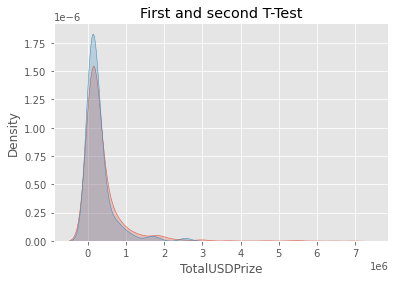

In [19]:
#Graficamos los dos samples 
a = df.TotalUSDPrize
b = prize_sample
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("First and second T-Test")

## Nivell 2. Exercici 2
### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [20]:
# Those are the genres in e-games
df.Genre.value_counts() 

Multiplayer Online Battle Arena    400
First-Person Shooter               200
Battle Royale                      200
Collectible Card Game              100
Strategy                           100
Name: Genre, dtype: int64

##### We want to know if there are significant difference between two genres means.
##### In this case we choose Multiplayer Online Battle Arena and First-Person Shooter
##### H0 : there is no difference in the average prize between the two genres
##### HA : there is difference between the average prize between the two genres

average Prize for Multiplayer Online Battle Arena is: 585841.7312249991


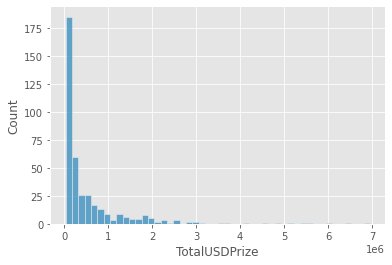

In [34]:
# We selec the genre "Multiplayer Online Battle Arena" and we ask for the mean prize.
Prize_MPOBA = df[df.Genre == "Multiplayer Online Battle Arena"].TotalUSDPrize
sns.histplot(Prize_MPOBA)
print(f'average Prize for Multiplayer Online Battle Arena is:', Prize_MPOBA.mean())

In [35]:
Prize_MPOBA.mean()

585841.7312249991

average prize for First-Person Shooter is:  344448.64700000035


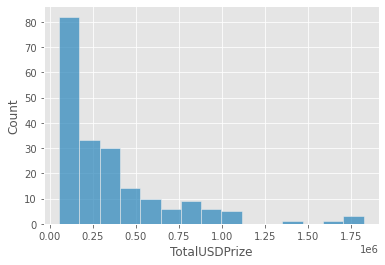

In [36]:
# We selec another genre: "First-Person Shooter" and we ask for the mean prize.
Prize_FPS  = df[df.Genre=='First-Person Shooter'].TotalUSDPrize
sns.histplot(Prize_FPS)
print(f'average prize for First-Person Shooter is: ', Prize_FPS.mean())

In [37]:
Genre_means = df.groupby('Genre').mean()[['TotalUSDPrize']]
round(Genre_means,2)

,TotalUSDPrize
Genre,
Battle Royale,279256.65
Collectible Card Game,133356.41
First-Person Shooter,344448.65
Multiplayer Online Battle Arena,585841.73
Strategy,253798.24


In [38]:
Genre_2means = Genre_means.loc[['First-Person Shooter', 'Multiplayer Online Battle Arena']]
Genre_2means

,TotalUSDPrize
Genre,
First-Person Shooter,344448.647000
Multiplayer Online Battle Arena,585841.731225


In [39]:
FPS_mean = Genre_2means.loc ["First-Person Shooter"][0]
MOBA_mean = Genre_2means.loc ["Multiplayer Online Battle Arena"][0]

In [40]:
# Std by Genre
Genre_std = df.groupby('Genre').agg(np.std, ddof=0)[['TotalUSDPrize']]
round(Genre_std,3)

,TotalUSDPrize
Genre,
Battle Royale,376291.373
Collectible Card Game,91065.096
First-Person Shooter,339337.101
Multiplayer Online Battle Arena,992567.195
Strategy,198768.539


In [41]:
Genre_2std = Genre_std.loc[['Multiplayer Online Battle Arena', 'First-Person Shooter']]
Genre_2std

,TotalUSDPrize
Genre,
Multiplayer Online Battle Arena,992567.194775
First-Person Shooter,339337.100594


In [42]:
FPS_std = Genre_2std.loc ["First-Person Shooter"][0]
MOBA_std = Genre_2std.loc ["Multiplayer Online Battle Arena"][0]

In [43]:
print("First-Person Shooter mean is ", round(FPS_mean,2), "and standard deviation is ", round(FPS_std),)
print("Multiplayer Online Battle Arena mean is ", round(MOBA_mean,2), "and standard deviation is ", round(MOBA_std),)

First-Person Shooter mean is  344448.65 and standard deviation is  339337
Multiplayer Online Battle Arena mean is  585841.73 and standard deviation is  992567


In [44]:
# t-student test for indenpendent samples
test2 = ttest_ind(a=Prize_MPOBA, b=Prize_FPS)
test2

Ttest_indResult(statistic=3.3375030843831204, pvalue=0.0008978246070385653)

In [46]:
print(f'P-value is {test2.pvalue} and significance level (alpha) is 0.025 (two sides) ')
alpha = (0.05/2)
if test2.pvalue < alpha:
    print('reject NULL hypothesis -> there are diferences')
else:
    print('can\'t reject NULL hypothesis')

P-value is 0.0008978246070385653 and significance level (alpha) is 0.025 (two sides) 
reject NULL hypothesis -> there are diferences


#### We reject the NULL HYPOTHESIS that means there is enough evidence to say there are differences between both sample means.


## Nivell 3. Exercici 3
### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [47]:
# In this case we take the first three countries with more observations in the dataframe
count = df['CountryCode'].value_counts() 
count.head()

kr    251
cn    168
us    114
se     45
ca     37
Name: CountryCode, dtype: int64

##### We want to know if there are significant difference between the means of the three countries with more observations.
##### In this case we choose Kr (Corea); cn (China); us (USA)
##### H0 : There is no difference in the average prize between the three countries; they are all the same
##### HA : The average prize is not the same between the three countries.

In [50]:
df3 = df.loc[df["CountryCode"].isin(["kr", "cn", "us"])]
df3.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
5,16800,Jakey,Yip,Stewie2k,us,1087340.00,Counter-Strike: Global Offensive,First-Person Shooter
12,11788,Jonathan,Jablonowski,ELiGE,us,930696.42,Counter-Strike: Global Offensive,First-Person Shooter
13,8635,Nick,Cannella,nitr0,us,920151.73,Counter-Strike: Global Offensive,First-Person Shooter
22,10630,Tarik,Celik,tarik,us,780039.21,Counter-Strike: Global Offensive,First-Person Shooter
36,4311,Will,Wierzba,Rush,us,586616.00,Counter-Strike: Global Offensive,First-Person Shooter


In [54]:
# Tomamos los tres primeros países que entran en las competiciones: korea, china, usa
# One way t-test ANOVA 
Korea_Country = df3[df3.CountryCode == 'kr']['TotalUSDPrize']
China_Country = df3[df3.CountryCode == 'cn']['TotalUSDPrize']
US_Country = df3[df3.CountryCode == 'us']['TotalUSDPrize']

In [55]:
# Comparamos las medias para cada país
Country_means = df3.groupby('CountryCode').mean()[['TotalUSDPrize']]
round(Country_means,2) 

,TotalUSDPrize
CountryCode,
cn,430904.04
kr,232835.59
us,378064.75


In [56]:
# The one-way ANOVA tests
test3 = f_oneway(Korea_Country,China_Country,US_Country)
print(test3)

F_onewayResult(statistic=10.447770299433403, pvalue=3.5461114321491386e-05)


In [60]:
alpha = (0.05/2)
if test3.pvalue < alpha:
    print('reject NULL hypothesis, there are no differences between the three sample means')
else:
    print('fail to reject NULL hypothesis --> there are differences between the three sample means')

reject NULL hypothesis, there are no differences between the three sample means


Text(0.5, 1.0, 'Three countries Korea, China, USA samples')

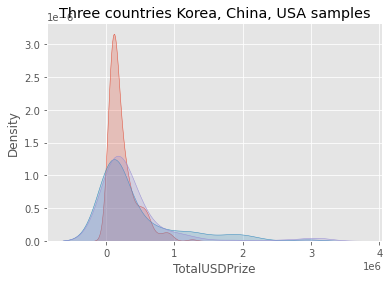

In [61]:
#Graficamos los tres samples 
a = Korea_Country
b = China_Country
c = US_Country
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
sns.kdeplot(c, shade=True)
plt.title("Three countries Korea, China, USA samples")